In [1]:
import os
import pickle
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline 

from scipy.stats import spearmanr
from collections import defaultdict, Counter


from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import SparsePCA



#import dataframe_image as dfi

In [2]:
from LeL_utils import visualize_properties_hm, split_subspaces, avg_predicted_properties

In [3]:
np.random.seed(42)

In [4]:
#load the nsubj_space to get properties names
sspace_nsubj = pd.read_csv("..\\Data\\Semantic_Spaces\\sspace_spr2_nsubj.csv", index_col = "Token.Sent")
properties = sspace_nsubj.columns.tolist()

## BabyBERTa predictions

In [5]:
def get_predictions(embeddings: dict,regressor, properties):
    #make predicitons
    y = np.array(list(embeddings.values()))
    y_hat = regressor.predict(y)

    #make predictions dataframe
    predictions_df = pd.DataFrame(y_hat, 
                        columns = properties).set_axis(list(embeddings.keys())
                        ).apply(lambda x:(x-x.min())/(x.max()-x.min()))
    return predictions_df
    

## BabyBERTa Predictions

In [7]:
#load embeddings to predict
bb_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_babyBERTa-2.pkl", "rb")) 
#load regressor
bb_regr = joblib.load(open("..\\Data\\Resgressors_NoSpca\\pls_regr_BabyBERTa.pkl", "rb"))

#make a df out of predicted values
bb_predictions = get_predictions(bb_ac_embs, bb_regr, properties)
bb_predictions

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.785050,0.418642,0.415935,0.620696,0.613681,0.774396,0.792094,0.947736,0.847426,0.869955,0.782527,0.788988,0.855205,0.780111
break.1,0.386225,0.149154,0.886945,0.673046,0.655376,0.490006,0.530184,0.660499,0.531206,1.000000,0.399815,0.397116,0.387629,0.609114
bend.2,0.548373,0.548247,0.354853,0.269477,0.370312,0.590629,0.600988,0.546792,0.451365,0.323024,0.563439,0.529282,0.556792,0.278562
bend.3,0.548469,0.387475,0.452214,0.370738,0.411232,0.597414,0.604189,0.628015,0.503613,0.511926,0.556076,0.536809,0.551670,0.433948
bake.4,0.694388,0.654355,0.339036,0.444548,0.546700,0.685335,0.723517,0.660067,0.591681,0.383051,0.708242,0.689958,0.681748,0.434286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.383982,0.223036,0.720419,0.158677,0.143935,0.497182,0.500771,0.510555,0.380571,0.680958,0.379210,0.372371,0.289886,0.487503
smash.96,0.598516,0.537837,0.400604,0.380009,0.413138,0.631570,0.643496,0.621092,0.480873,0.372902,0.602640,0.574680,0.595311,0.465293
smash.97,0.380442,0.490152,0.833913,0.594915,0.653278,0.500868,0.547706,0.518480,0.340476,0.634234,0.398801,0.362345,0.374662,0.410789
macerate.98,0.760216,0.518715,0.156686,0.314437,0.291149,0.786136,0.772435,0.782891,0.714266,0.447222,0.761371,0.753216,0.712345,0.627239


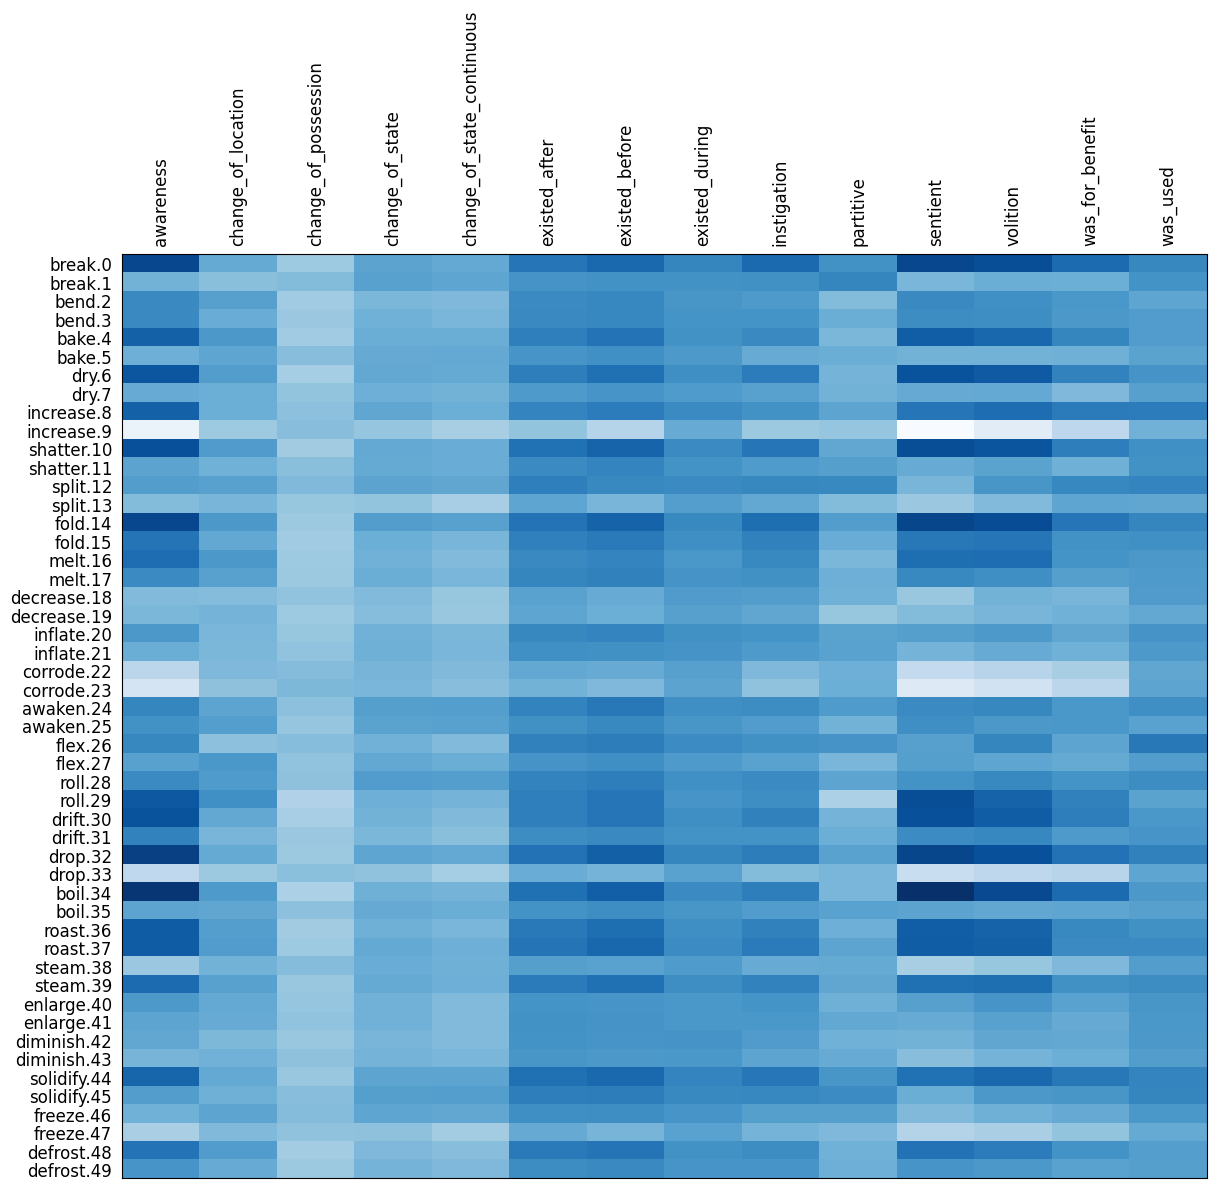

In [17]:
#visualize heatmap of half space
visualize_properties_hm(bb_predictions[:50])

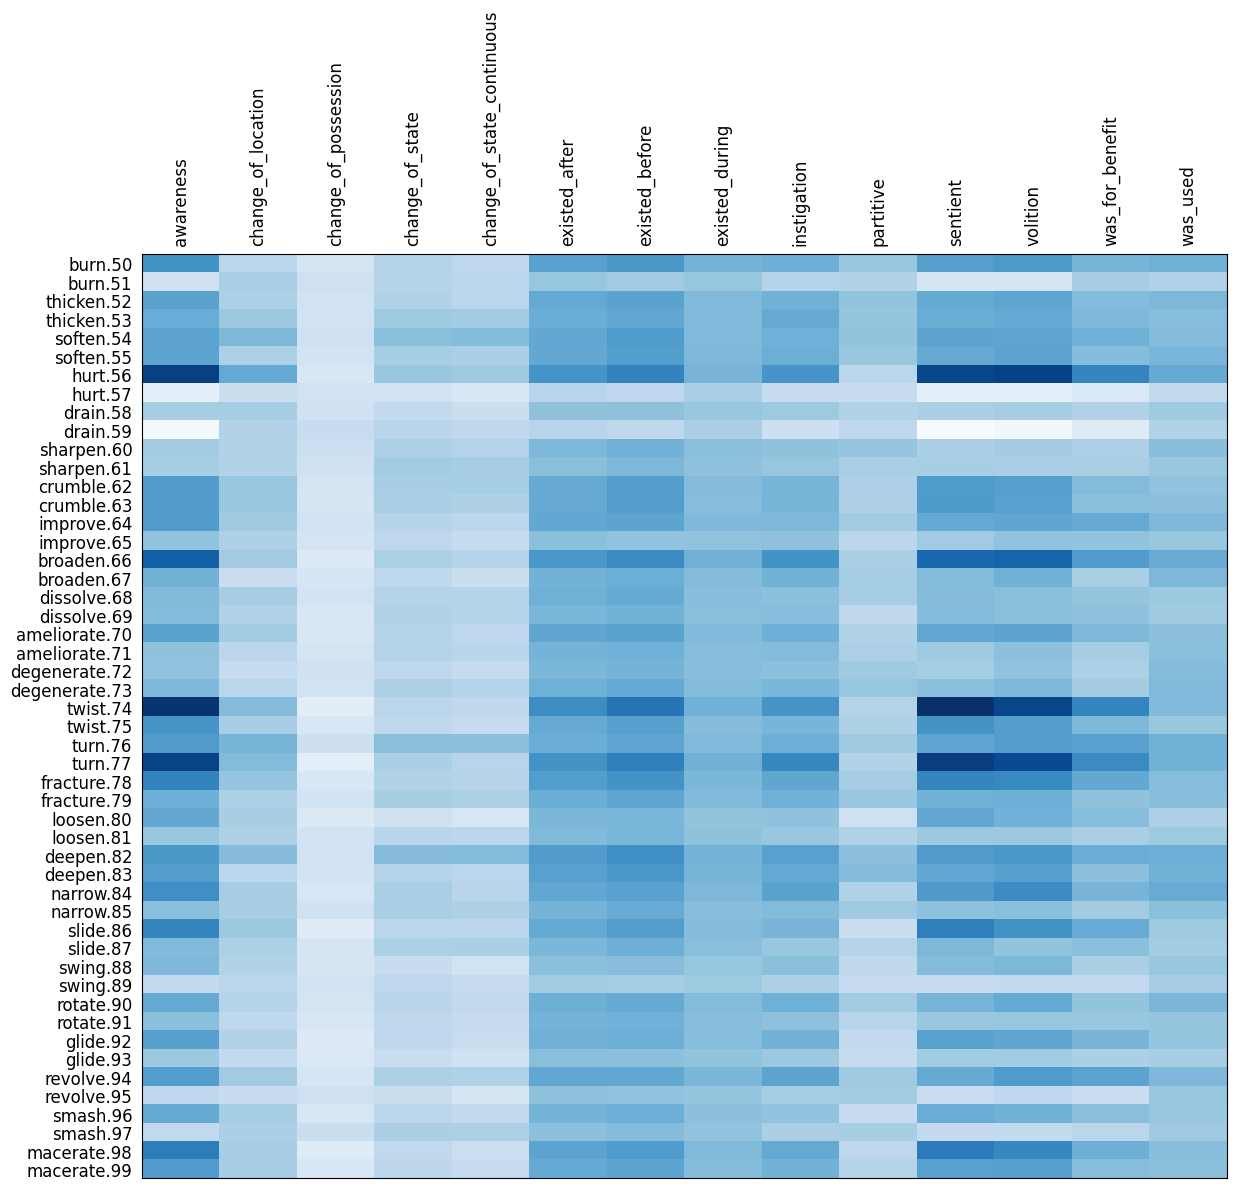

In [18]:
visualize_properties_hm(bb_predictions[50:])

In [8]:
#split the space into transitive use and intransitive use subspaces to get the values
bb_preds_transitive,bb_preds_intransitive = split_subspaces(bb_predictions,properties)

In [23]:
bb_preds_transitive

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,2.393049,0.713874,0.110873,0.832837,0.744449,1.629293,1.849318,1.377163,1.829879,1.179545,2.384661,2.285720,1.803846,1.346907
bend.2,1.305560,0.900821,0.075006,0.478682,0.437058,1.296330,1.352016,1.088230,1.029309,0.390087,1.300402,1.199891,1.064226,0.807855
bake.4,1.976473,1.053877,0.065719,0.655216,0.659847,1.467925,1.670864,1.169859,1.312936,0.476732,2.017029,1.871674,1.373930,0.975224
dry.6,2.149976,0.963099,0.029187,0.754864,0.721704,1.493305,1.725470,1.214500,1.524517,0.530767,2.208020,2.082772,1.428767,1.117066
increase.8,1.965838,0.632714,0.291935,0.791928,0.646293,1.393107,1.515634,1.283638,1.164076,0.819071,1.644984,1.777703,1.537398,1.530475
shatter.10,2.262469,0.982731,0.048933,0.739545,0.672091,1.699730,1.927183,1.292637,1.619683,0.768450,2.286303,2.168624,1.487179,1.210240
split.12,0.951281,0.893607,0.429218,0.840661,0.795941,1.476075,1.321272,1.283712,1.331938,1.314878,0.504681,1.085334,1.348421,1.391026
fold.14,2.382921,1.055305,0.129204,0.961303,0.893547,1.669935,1.947428,1.323461,1.753887,0.951994,2.405825,2.312972,1.628223,1.378421
melt.16,1.766972,1.062839,0.112783,0.576643,0.407366,1.300847,1.382080,1.070521,1.324699,0.465632,1.762789,1.780762,1.143342,1.058695
decrease.18,0.402217,0.376986,0.231334,0.397066,0.192896,0.874478,0.689515,0.984758,0.952535,0.588608,0.173073,0.561483,0.513168,0.986668


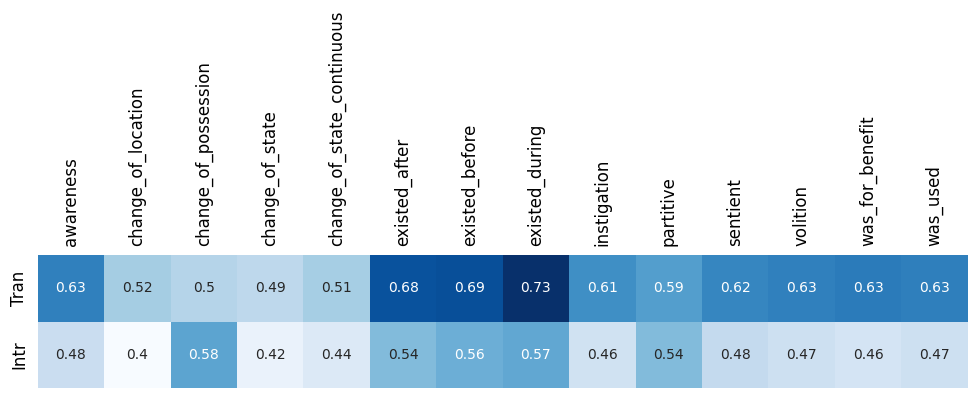

In [11]:
#plot the average predicted properties for the respective spaces
bb_avg_pred_props = avg_predicted_properties(bb_preds_transitive,bb_preds_intransitive )

## Pythia70m predictions

In [14]:
pythia_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_pythia-70m-deduped.pkl", "rb"))
pythia_regr = joblib.load(open("..\\Data\\Resgressors_NoSpca\\pls_regr_Pythia70m.pkl","rb"))

pythia_predictions = get_predictions(pythia_embs,pythia_regr,properties)
pythia_predictions

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.625389,0.262018,0.155215,0.261666,0.271080,0.381457,0.323559,0.149467,0.637302,0.159295,0.569905,0.653735,0.599808,0.338587
break.1,0.063795,0.201303,0.814270,0.513567,0.492840,0.162959,0.110990,0.252414,0.307384,0.452393,0.058546,0.081284,0.123308,0.555879
bend.2,0.883085,0.293436,0.000000,0.319472,0.353330,0.927500,0.873238,0.828339,0.939128,0.234627,0.878222,0.889806,0.848793,0.476578
bend.3,0.482494,0.492701,0.595894,0.499397,0.499766,0.790532,0.803092,0.804530,0.602130,0.655887,0.529246,0.469681,0.483543,0.514494
bake.4,0.553594,0.402038,0.289649,0.322087,0.332782,0.514089,0.515779,0.368040,0.533476,0.236662,0.571472,0.546600,0.527545,0.223653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.604453,0.365691,0.333939,0.330359,0.329321,0.566080,0.565301,0.414422,0.584942,0.379725,0.593167,0.599644,0.549714,0.302785
smash.96,0.966710,0.748635,0.349893,0.663866,0.654076,0.959922,0.944391,0.842318,0.946061,0.409936,0.928096,0.966517,0.951014,0.966086
smash.97,0.418303,0.196718,0.548667,0.305006,0.284150,0.456260,0.461184,0.399782,0.517434,0.479954,0.413209,0.421891,0.399488,0.421258
macerate.98,0.813788,0.589999,0.143671,0.230135,0.246613,0.888514,0.905063,0.690930,0.666085,0.163370,0.858557,0.775775,0.687287,0.289799


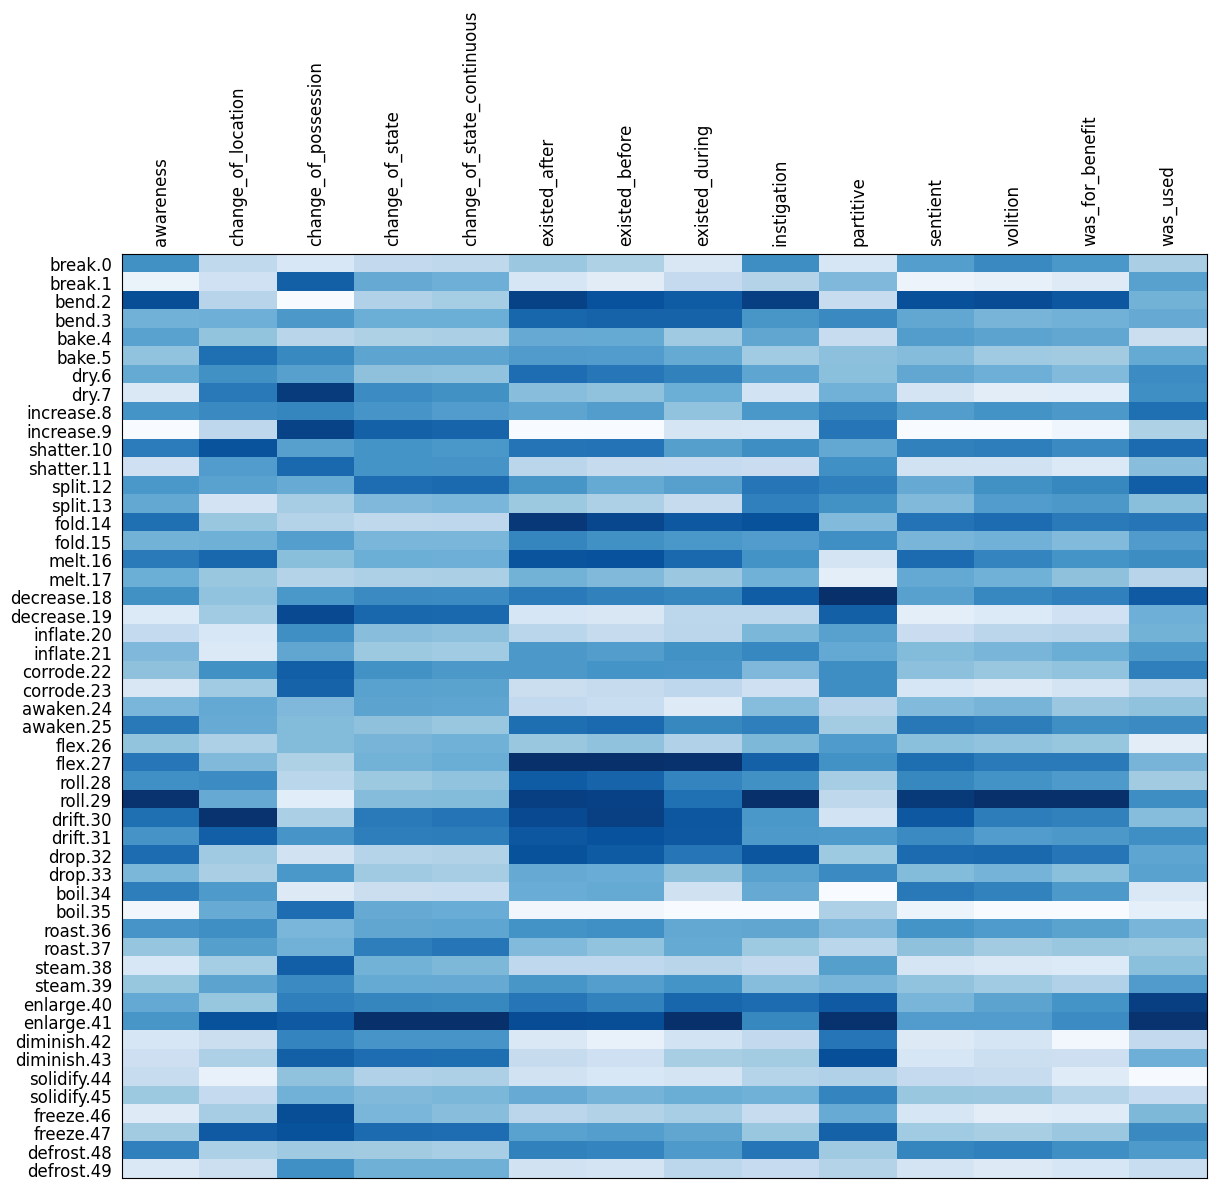

In [16]:
visualize_properties_hm(pythia_predictions[:50])

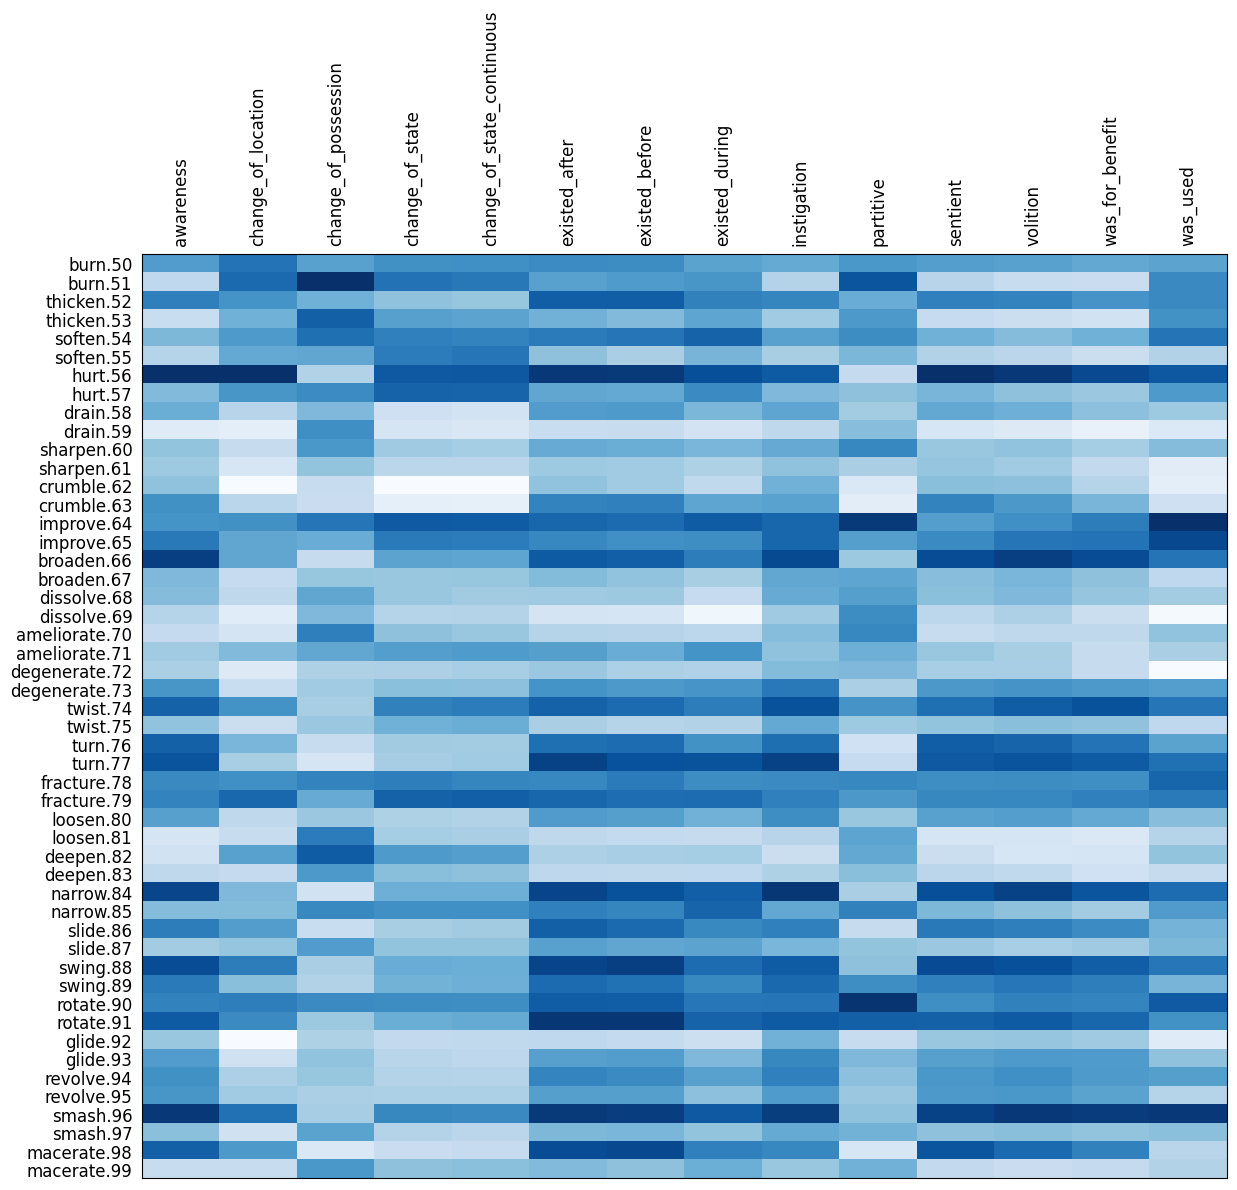

In [17]:
visualize_properties_hm(pythia_predictions[50:])

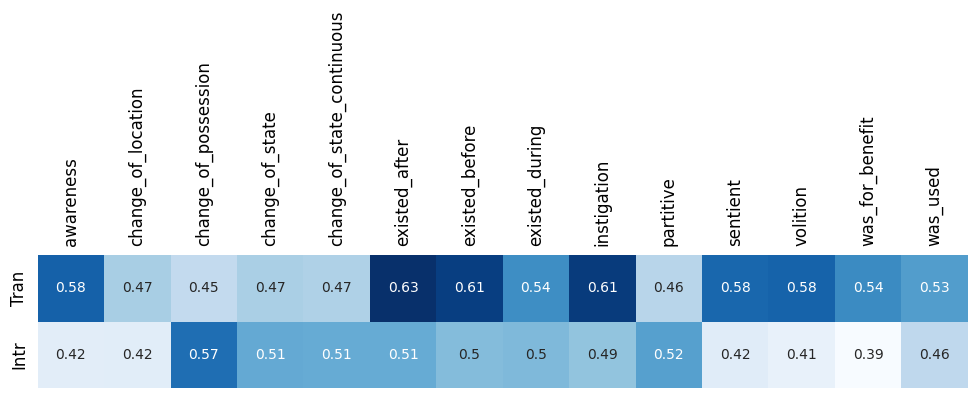

In [15]:
pythia_trans, pythia_intrans = split_subspaces(pythia_predictions,properties)
pythia_avg_pred_prop = avg_predicted_properties(pythia_trans,pythia_intrans,properties)

## GPT2-XL predictions

In [16]:
#load embeddings to predict
gpt2xl_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_GPT2-XL.pkl", "rb")) 
#load regressor
gpt2xl_regr = joblib.load(open("..\\Data\\Resgressors_NoSpca\\pls_regr_GPT2-XL_nospca.pkl", "rb"))

#make prediction dataframe
gpt2xl_predictions =get_predictions(gpt2xl_ac_embs,gpt2xl_regr,properties)
gpt2xl_predictions

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.833134,0.851746,0.111817,0.225715,0.270375,0.691085,0.686736,0.463295,0.683488,0.000000,0.868643,0.824409,0.765663,0.484620
break.1,0.296975,0.508856,0.645413,0.527294,0.516497,0.322952,0.312632,0.396333,0.354980,0.492391,0.302382,0.301015,0.322316,0.431491
bend.2,0.783576,0.578272,0.178537,0.263248,0.293983,0.710351,0.727168,0.674392,0.764944,0.327176,0.798591,0.785524,0.767446,0.646672
bend.3,0.472862,0.554322,0.493847,0.603961,0.620166,0.561670,0.599736,0.781358,0.552326,0.713433,0.476217,0.467400,0.575484,0.634019
bake.4,0.992872,0.688608,0.133942,0.247601,0.270491,0.893981,0.948456,0.834380,1.000000,0.404580,0.985851,0.997895,1.000000,0.932445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.552724,0.278018,0.366646,0.241074,0.249312,0.488882,0.509794,0.473931,0.630161,0.577059,0.553427,0.570786,0.580358,0.476606
smash.96,0.887117,0.726831,0.177321,0.226109,0.239663,0.848619,0.869496,0.677671,0.819242,0.270018,0.901186,0.879706,0.830135,0.669277
smash.97,0.430941,0.391639,0.521319,0.265833,0.265600,0.460855,0.428858,0.374873,0.473268,0.525438,0.426174,0.442458,0.430665,0.482167
macerate.98,0.785269,0.374093,0.158814,0.088320,0.108520,0.741389,0.778614,0.644474,0.794238,0.485918,0.795252,0.791263,0.762404,0.530020


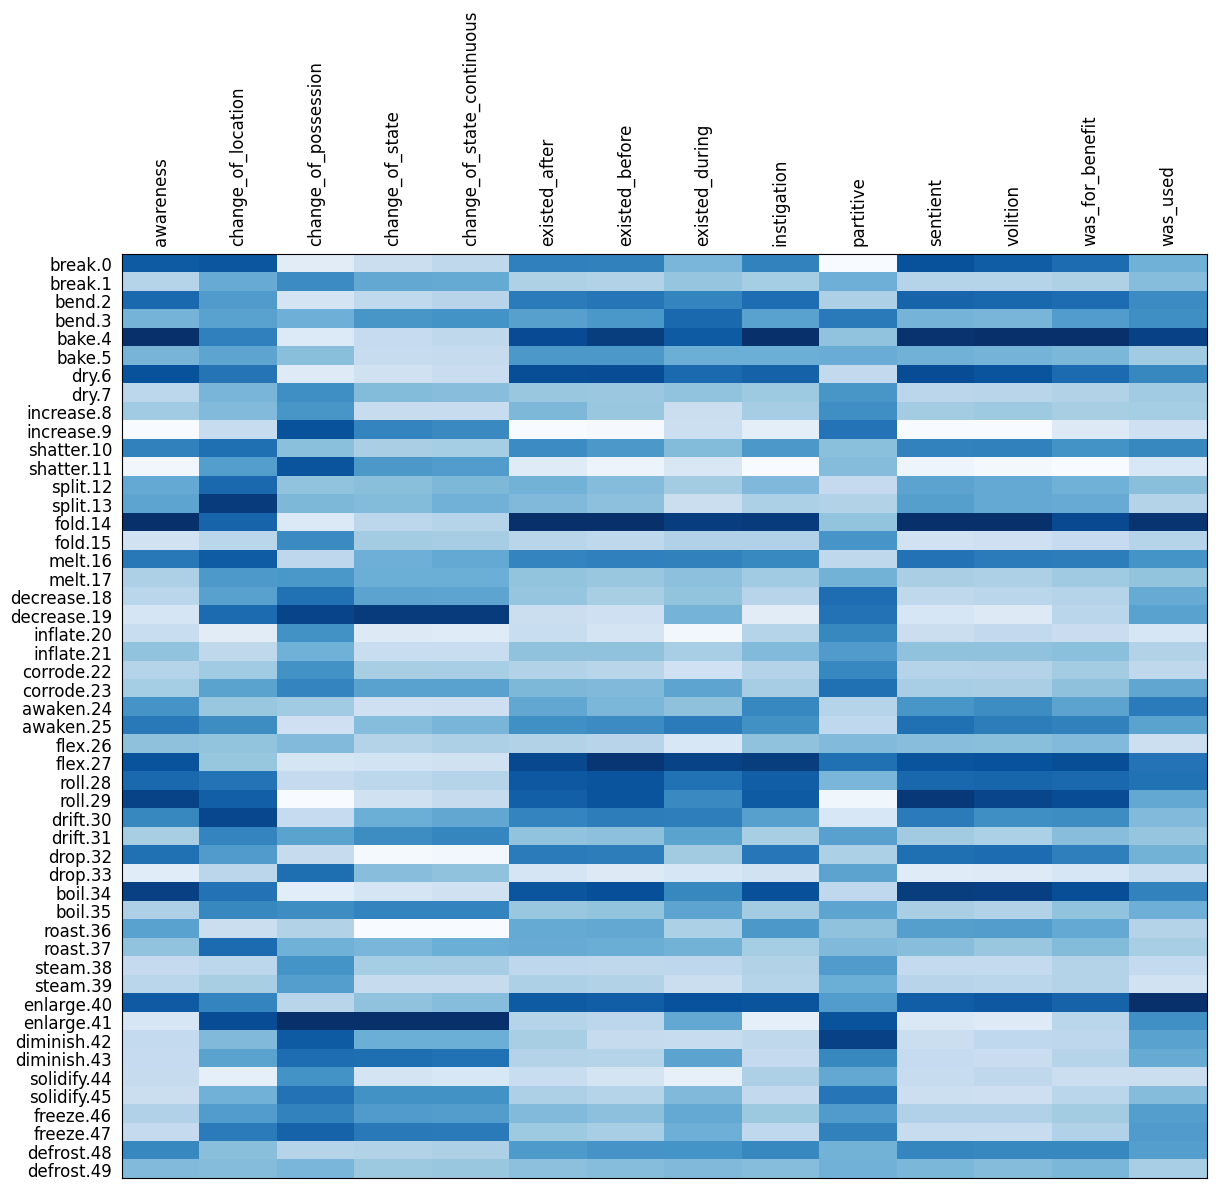

In [20]:
visualize_properties_hm(gpt2xl_predictions[:50])

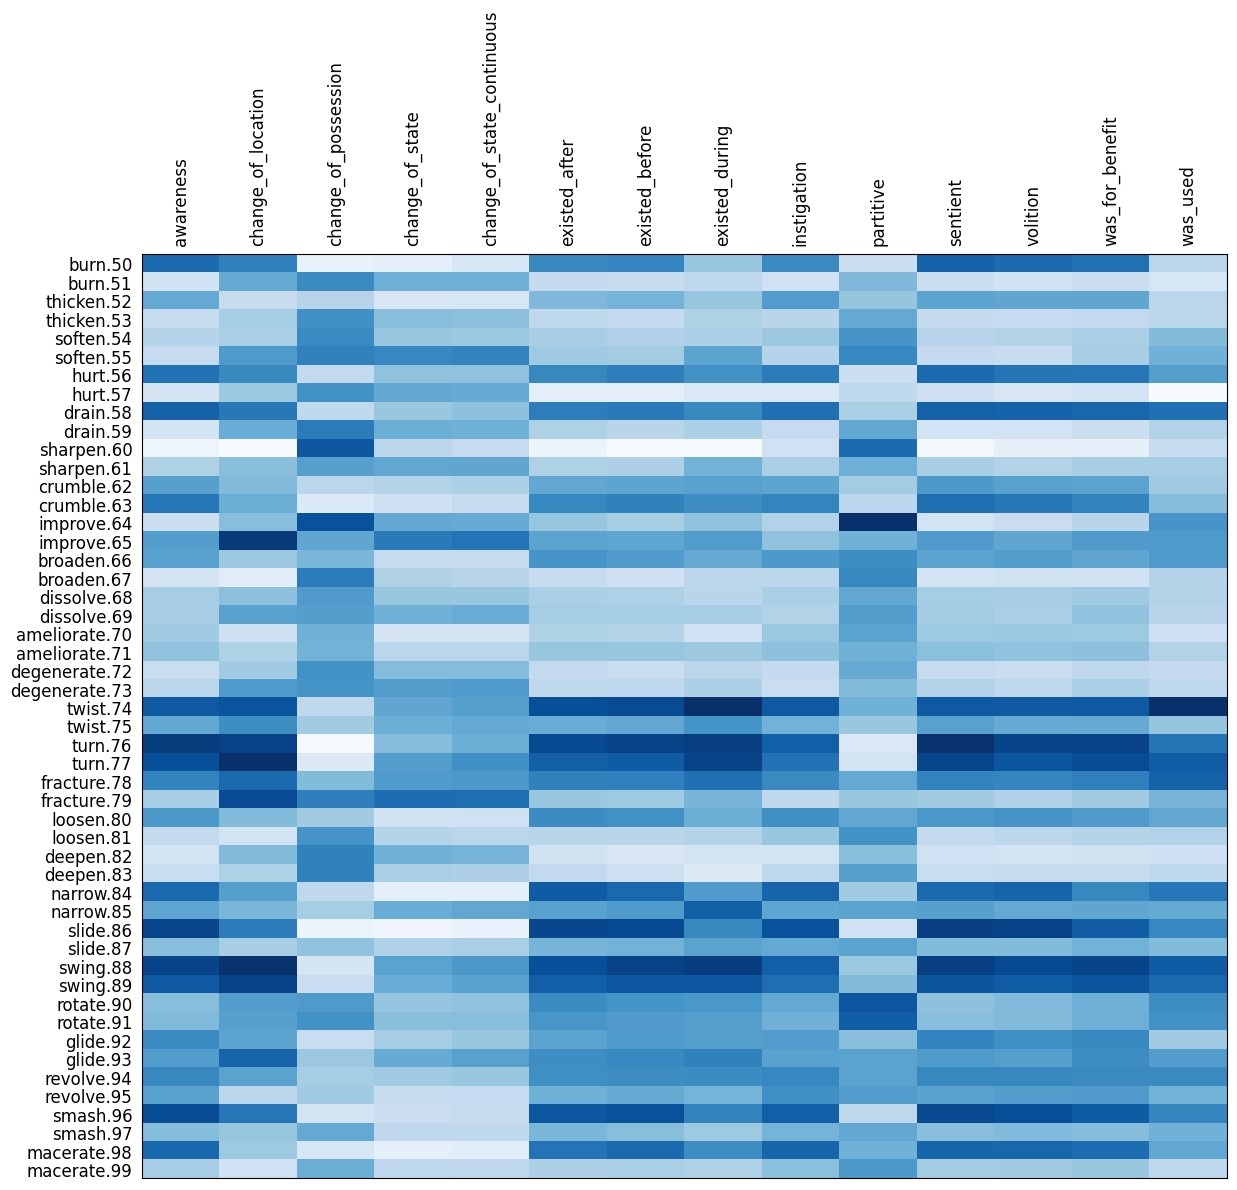

In [21]:
visualize_properties_hm(gpt2xl_predictions[50:])

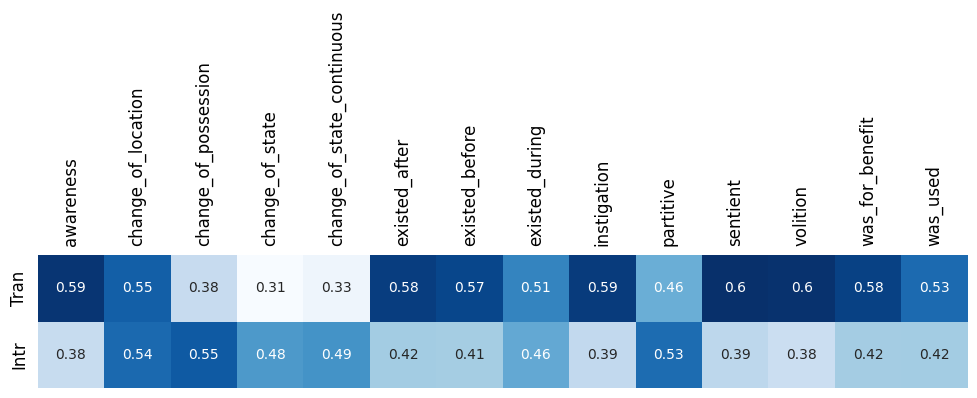

In [17]:
gpt_trans,gpt_intrans = split_subspaces(gpt2xl_predictions,properties)
gpt_avg_pred_prop = avg_predicted_properties(gpt_trans,gpt_intrans,properties)

## DistilBERT Predictions

In [8]:
#load embeddings to predict
db_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_distilbert-base-uncased.pkl", "rb")) 
#load regressor
db_regr = joblib.load(open("..\\Data\\Resgressors_NoSpca\\pls_regr_DistilBERT.pkl", "rb"))

#make a df out of predicted values
db_predictions = get_predictions(db_ac_embs, db_regr, properties)
db_predictions

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.940553,0.899450,0.180756,0.524020,0.540944,0.838925,0.763005,0.754796,0.744173,0.104088,0.950816,0.885324,0.811761,0.569580
break.1,0.255363,0.509194,0.758851,0.626746,0.613019,0.321207,0.213572,0.396042,0.175905,0.341859,0.242491,0.243992,0.232500,0.650913
bend.2,0.808451,0.426746,0.391156,0.006118,0.000000,0.646384,0.661307,0.554592,0.781888,0.260412,0.800880,0.833299,0.732299,0.670961
bend.3,0.405435,0.477338,0.649816,0.426979,0.453290,0.585310,0.513740,0.618963,0.333583,0.842001,0.403098,0.368910,0.331031,0.568051
bake.4,0.897276,0.668572,0.396217,0.251037,0.237396,0.640938,0.681166,0.546592,0.797225,0.212913,0.887466,0.920011,0.844803,0.692760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.266184,0.279377,0.620611,0.305565,0.311174,0.107992,0.122010,0.114114,0.061823,0.371154,0.275800,0.230206,0.232471,0.181846
smash.96,0.831298,0.819963,0.389317,0.456147,0.478593,0.869247,0.820405,0.835613,0.650685,0.519174,0.838347,0.777768,0.741571,0.619822
smash.97,0.345612,0.658964,0.511130,0.821273,0.864388,0.399005,0.356349,0.610160,0.272888,0.540568,0.328880,0.304846,0.446247,0.413123
macerate.98,0.677152,0.749148,0.587450,0.498186,0.445642,0.389755,0.405471,0.433466,0.501315,0.225228,0.666903,0.688349,0.727203,0.605792


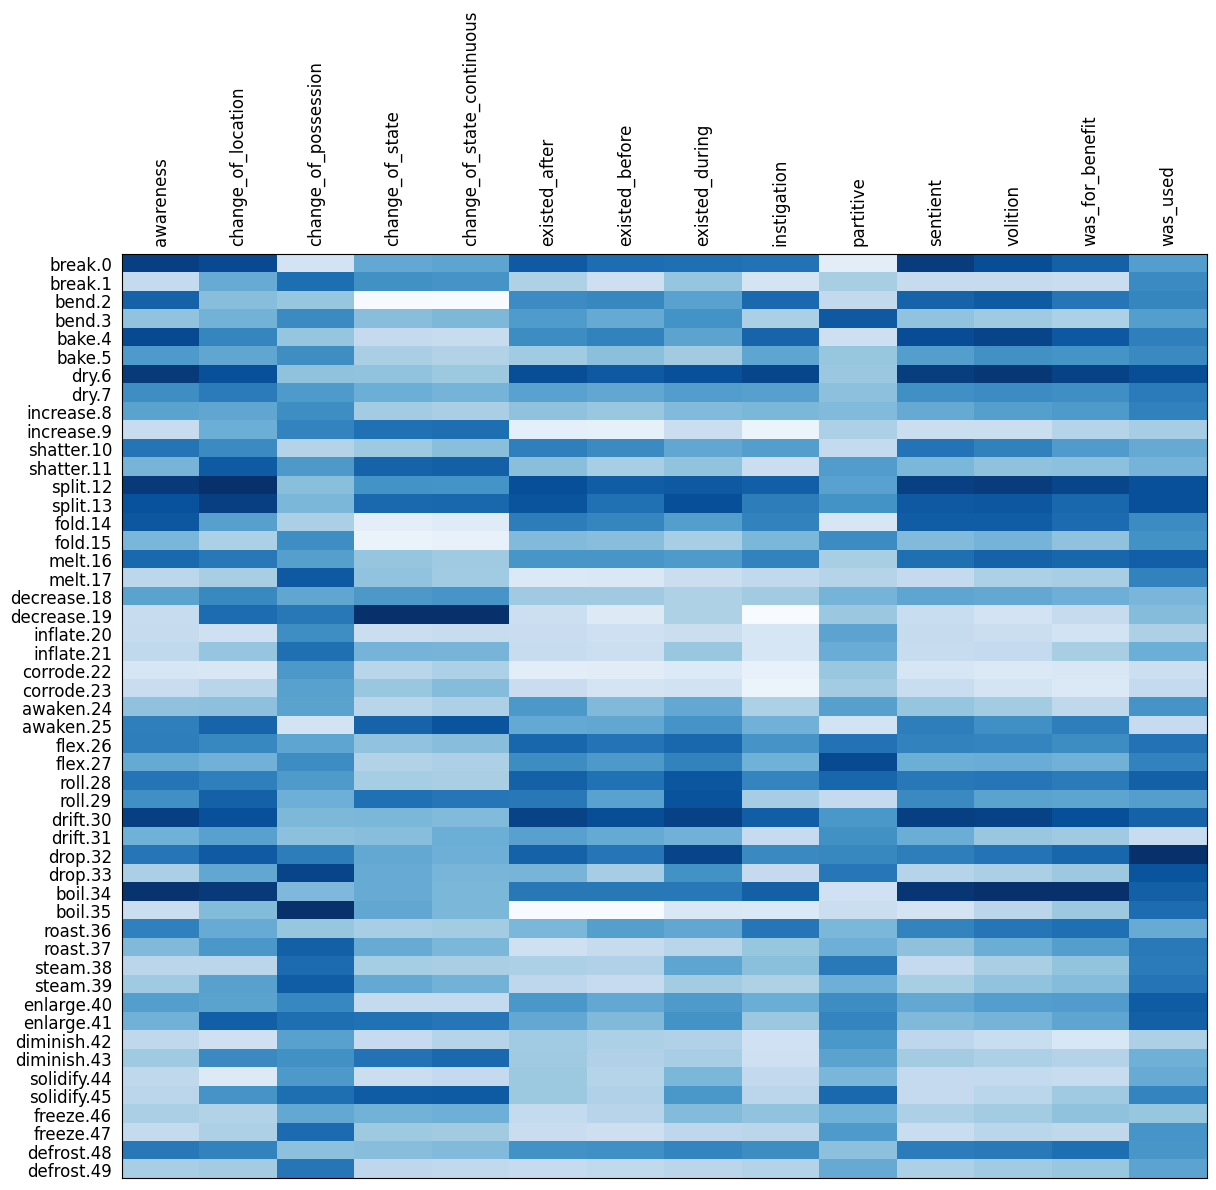

In [9]:
visualize_properties_hm(db_predictions[:50])

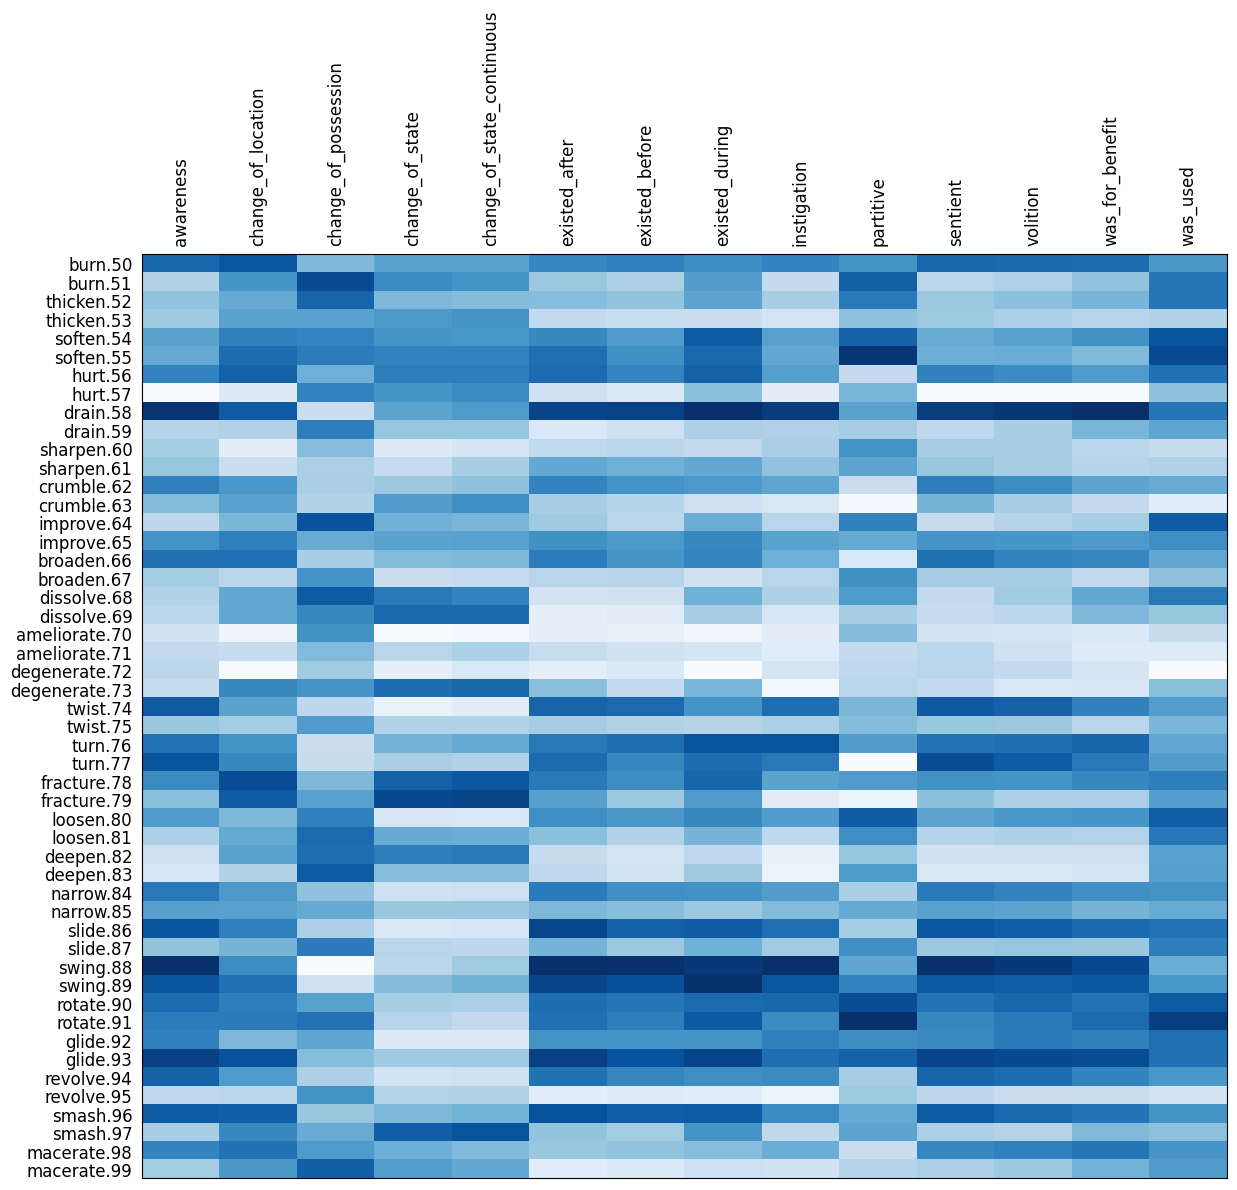

In [10]:
visualize_properties_hm(db_predictions[50:])

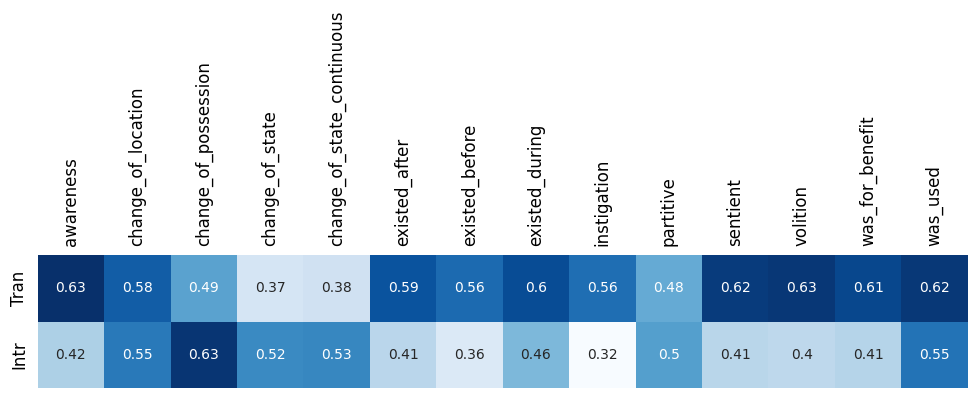

In [12]:
db_trans,db_intrans = split_subspaces(db_predictions,properties)
db_avg_pred_props = avg_predicted_properties(db_trans,db_intrans,properties)

## Aggregation

In [18]:
# Create MultiIndex
arrays = [properties, properties, properties]
names = ['DistilBERT', 'Pythia70m', 'GPT2-XL']
index = pd.MultiIndex.from_product([names, ['Tr', 'Intr']], names=['Embeddings', 'Subspace'])
final_df = pd.concat([db_avg_pred_props, pythia_avg_pred_prop, gpt_avg_pred_prop], axis=0)
final_df.index = index
final_df.round(2)

awareness  change_of_location  change_of_possession  \
Embeddings Subspace                                                        
DistilBERT Tr             0.63                0.58                  0.49   
           Intr           0.42                0.55                  0.63   
Pythia70m  Tr             0.58                0.47                  0.45   
           Intr           0.42                0.42                  0.57   
GPT2-XL    Tr             0.59                0.55                  0.38   
           Intr           0.38                0.54                  0.55   

                     change_of_state  change_of_state_continuous  \
Embeddings Subspace                                                
DistilBERT Tr                   0.37                        0.38   
           Intr                 0.52                        0.53   
Pythia70m  Tr                   0.47                        0.47   
           Intr                 0.51                        0.51   
GPT2-XL    Tr                   0.31                        0.33   
           Intr                 0.48                        0.49   

                     existed_after  existed_before  existed_during  \
Embeddings Subspace                                                  
DistilBERT Tr                 0.59            0.56            0.60   
           Intr               0.41            0.36            0.46   
Pythia70m  Tr                 0.63            0.61            0.54   
           Intr               0.51            0.50            0.50   
GPT2-XL    Tr                 0.58            0.57            0.51   
           Intr               0.42            0.41            0.46   

                     instigation  partitive  sentient  volition  \
Embeddings Subspace                                               
DistilBERT Tr               0.56       0.48      0.62      0.63   
           Intr             0.32       0.50      0.41      0.40   
Pythia70m  Tr               0.61       0.46      0.58      0.58   
           Intr             0.49       0.52      0.42      0.41   
GPT2-XL    Tr               0.59       0.46      0.60      0.60   
           Intr             0.39       0.53      0.39      0.38   

                     was_for_benefit  was_used  
Embeddings Subspace                             
DistilBERT Tr                   0.61      0.62  
           Intr                 0.41      0.55  
Pythia70m  Tr                   0.54      0.53  
           Intr                 0.39      0.46  
GPT2-XL    Tr                   0.58      0.53  
           Intr                 0.42      0.42

In [19]:
os.mkdir("..\\Data\\Results")

final_df.to_csv("..\\Data\\Results\\average_AC_preds.csv")

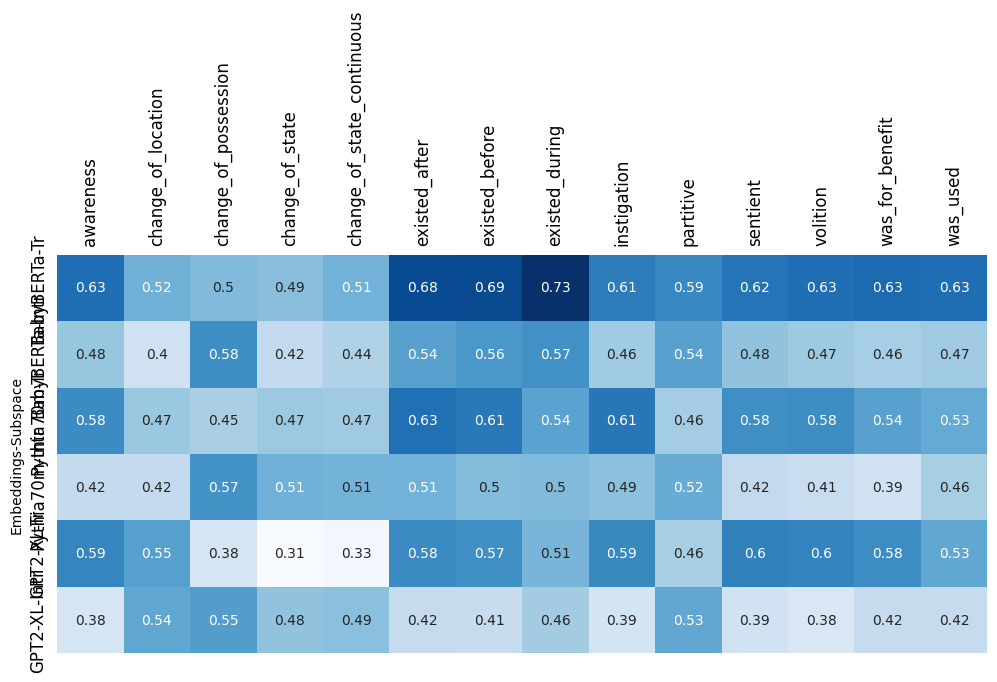

In [39]:
# plot of properties means comparison
plt.figure(figsize= (12,9))

ax = sns.heatmap(final_df, cmap = 'Blues',
                square = True, cbar = False, annot = True
                )

# remove ticks and set position and orientation for ticks label
ax.tick_params(labeltop = True, labelbottom = False, rotation = 90, 
                labelsize = 12, bottom = False, left = False)



plt.show()

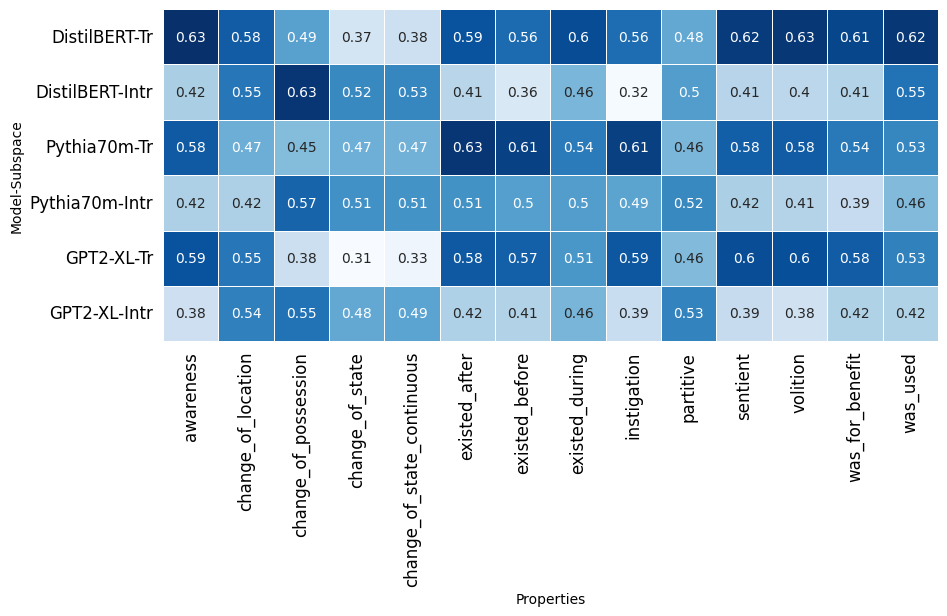

In [26]:

def plot_multiindex_heatmap(dataframe):
    # Transpose the DataFrame for better visualization
    transposed_df = dataframe.transpose()
    
    # Create a heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(dataframe, cmap="Blues",square = True, linewidths=.5, annot = True,cbar = False)
    
    # remove ticks and set position and orientation for ticks label
    ax.tick_params(labeltop = False, labelbottom = True,
                labelsize = 12, bottom = False, left = False)
    # Set plot title and labels
    
    plt.xlabel("Properties")
    plt.ylabel("Model-Subspace")

    # Show the plot
    plt.show()

# Example usage:
# Assuming you already have 'final_df' as your DataFrame
plot_multiindex_heatmap(final_df)

In [ ]:
f, a = plt.subplots(3,1)
df.xs('A').plot(kind='bar',ax=a[0])
df.xs('B').plot(kind='bar',ax=a[1])
df.xs('C').plot(kind='bar',ax=a[2])

In [67]:
final_df.xs()

<bound method NDFrame.xs of                      awareness  change_of_location  change_of_possession  \
Embeddings Subspace                                                        
BabyBERTa  Tr         0.627296            0.515332              0.497788   
           Intr       0.475130            0.398318              0.577841   
Pythia70m  Tr         0.581750            0.473241              0.453611   
           Intr       0.418134            0.418781              0.569408   
GPT2-XL    Tr         0.592351            0.546613              0.383131   
           Intr       0.382377            0.535038              0.552430   

                     change_of_state  change_of_state_continuous  \
Embeddings Subspace                                                
BabyBERTa  Tr               0.489743                    0.513403   
           Intr             0.420332                    0.444394   
Pythia70m  Tr               0.471403                    0.468434   
           Intr        